In [37]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import optuna
import shap

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder                      

In [38]:

folder_path = 'S_CS-figure'

# 检查文件夹是否存在，如果不存在则创建它
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"文件夹 {folder_path} 已创建。")

In [39]:
df = pd.read_csv("S_CSlog_填充.csv",  dtype={'DIPOCE': str, 'BA_Code': str, 'Cata_Code': str, 'FM_N': str})
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,CHS,A_Mix_t,AB_Mix_t,Q,Cata_Code,MCS,CS_rate,CS_TD,Closed_CC,S_CS
0,110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,59.700000,294.0,5.10,0.00,100000,108.6000,0.001667,0,90.8000,5.777174
1,110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,59.700000,289.8,5.29,0.00,100000,94.1000,0.001667,1,90.8000,3.567935
2,100010000,31.4,537.000000,6.137392,1000,18.0,1.500000,0.060000,0.025000,0.010000,...,60.000000,35.0,35.00,629.03,10000,222.8860,0.002074,0,82.2307,3.169014
3,100010000,31.4,698.000000,6.187663,1000,18.0,1.153000,0.038500,0.019000,0.007700,...,53.600000,35.0,35.00,629.03,10000,182.1925,0.002095,0,84.9192,4.727273
4,100010000,31.4,480.000000,6.362176,1000,18.0,1.670000,0.056000,0.028000,0.011000,...,62.500000,35.0,35.00,629.03,10000,223.4620,0.002074,0,79.8028,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,110000010,31.0,450.000000,3.000000,1000,18.0,55.555556,0.333333,1.166667,0.222222,...,64.285714,120.0,30.00,48.00,100000,120.0000,0.001991,0,96.1000,13.688525
196,110000010,31.0,450.000000,3.000000,1000,18.0,54.644809,0.437158,1.147541,0.218579,...,64.664311,120.0,30.00,48.00,100000,137.0000,0.001983,0,95.1000,12.666667
197,110000010,31.0,450.000000,3.000000,1000,18.0,53.475936,0.534759,1.122995,0.213904,...,65.156794,120.0,30.00,48.00,100000,151.0000,0.001983,0,94.0000,12.111111
198,110000010,31.0,450.000000,3.000000,1000,18.0,52.631579,0.631579,1.105263,0.210526,...,65.517241,120.0,30.00,48.00,100000,180.0000,0.001983,0,93.1000,9.135802


In [40]:
pad_lengths = {
    'DIPOCE': 10,    # 9位
    'BA_Code': 4,   # 4位
    'Cata_Code': 6  # 6位
}

for col, length in pad_lengths.items():
    df[col] = df[col].astype(str).str.zfill(length)
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,CHS,A_Mix_t,AB_Mix_t,Q,Cata_Code,MCS,CS_rate,CS_TD,Closed_CC,S_CS
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,59.700000,294.0,5.10,0.00,100000,108.6000,0.001667,0,90.8000,5.777174
1,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,59.700000,289.8,5.29,0.00,100000,94.1000,0.001667,1,90.8000,3.567935
2,0100010000,31.4,537.000000,6.137392,1000,18.0,1.500000,0.060000,0.025000,0.010000,...,60.000000,35.0,35.00,629.03,010000,222.8860,0.002074,0,82.2307,3.169014
3,0100010000,31.4,698.000000,6.187663,1000,18.0,1.153000,0.038500,0.019000,0.007700,...,53.600000,35.0,35.00,629.03,010000,182.1925,0.002095,0,84.9192,4.727273
4,0100010000,31.4,480.000000,6.362176,1000,18.0,1.670000,0.056000,0.028000,0.011000,...,62.500000,35.0,35.00,629.03,010000,223.4620,0.002074,0,79.8028,1.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0110000010,31.0,450.000000,3.000000,1000,18.0,55.555556,0.333333,1.166667,0.222222,...,64.285714,120.0,30.00,48.00,100000,120.0000,0.001991,0,96.1000,13.688525
196,0110000010,31.0,450.000000,3.000000,1000,18.0,54.644809,0.437158,1.147541,0.218579,...,64.664311,120.0,30.00,48.00,100000,137.0000,0.001983,0,95.1000,12.666667
197,0110000010,31.0,450.000000,3.000000,1000,18.0,53.475936,0.534759,1.122995,0.213904,...,65.156794,120.0,30.00,48.00,100000,151.0000,0.001983,0,94.0000,12.111111
198,0110000010,31.0,450.000000,3.000000,1000,18.0,52.631579,0.631579,1.105263,0.210526,...,65.517241,120.0,30.00,48.00,100000,180.0000,0.001983,0,93.1000,9.135802


In [41]:

y = np.log10(df['S_CS'])

X = df.drop(["S_CS"], axis=1)
X

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,A_Mix_t,AB_Mix_t,Q,Cata_Code,MCS,CS_rate,CS_TD,Closed_CC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,294.0,5.10,0.00,100000,108.6000,0.001667,0,90.8000
1,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,289.8,5.29,0.00,100000,94.1000,0.001667,1,90.8000
2,0100010000,31.4,537.000000,6.137392,1000,18.0,1.500000,0.060000,0.025000,0.010000,...,0.70,60.000000,35.0,35.00,629.03,010000,222.8860,0.002074,0,82.2307
3,0100010000,31.4,698.000000,6.187663,1000,18.0,1.153000,0.038500,0.019000,0.007700,...,0.70,53.600000,35.0,35.00,629.03,010000,182.1925,0.002095,0,84.9192
4,0100010000,31.4,480.000000,6.362176,1000,18.0,1.670000,0.056000,0.028000,0.011000,...,0.70,62.500000,35.0,35.00,629.03,010000,223.4620,0.002074,0,79.8028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0110000010,31.0,450.000000,3.000000,1000,18.0,55.555556,0.333333,1.166667,0.222222,...,1.05,64.285714,120.0,30.00,48.00,100000,120.0000,0.001991,0,96.1000
196,0110000010,31.0,450.000000,3.000000,1000,18.0,54.644809,0.437158,1.147541,0.218579,...,1.05,64.664311,120.0,30.00,48.00,100000,137.0000,0.001983,0,95.1000
197,0110000010,31.0,450.000000,3.000000,1000,18.0,53.475936,0.534759,1.122995,0.213904,...,1.05,65.156794,120.0,30.00,48.00,100000,151.0000,0.001983,0,94.0000
198,0110000010,31.0,450.000000,3.000000,1000,18.0,52.631579,0.631579,1.105263,0.210526,...,1.05,65.517241,120.0,30.00,48.00,100000,180.0000,0.001983,0,93.1000


In [42]:
X.describe()

,DI_NCO,PO_HV,PO_f,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,f(H2O),M_loss,Yield,R,CHS,A_Mix_t,AB_Mix_t,Q,MCS,CS_rate,CS_TD,Closed_CC
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,31.461530,555.920789,4.913464,39.028498,67.105714,8.444361,1.438110,1.044556,0.105716,11.599356,94.389368,1.122847,60.081753,280.092500,14.481650,123.973700,284.127571,0.002199,0.295000,86.486710
std,0.563602,335.371832,1.557438,32.623607,23.236842,9.863917,0.552061,0.732252,0.072043,9.446512,4.458384,0.241817,7.960857,257.859888,7.161253,213.331359,153.431243,0.001196,0.457187,12.220051
min,31.000000,200.838968,2.000000,0.000000,0.650000,0.000000,0.011000,0.000000,0.000000,0.000000,85.824561,0.700000,32.800000,10.000000,5.000000,0.000000,20.000000,0.001640,0.000000,9.000000
25%,31.000000,406.000000,4.063615,18.000000,55.555556,1.478757,1.166667,0.720000,0.056000,4.323798,89.022222,1.030000,56.200000,103.612500,10.000000,0.000000,179.825130,0.001667,0.000000,85.421100
50%,31.400000,433.439828,4.579652,18.000000,68.013605,3.125000,1.445000,1.078361,0.083333,7.995846,96.511046,1.100000,59.525000,272.750000,12.170000,34.632500,236.533135,0.001706,0.000000,90.030200
75%,31.500000,490.805218,5.490234,48.409784,85.676724,19.622642,1.715400,1.336068,0.140000,21.214597,97.699996,1.252500,64.285714,300.250000,18.000000,68.460000,393.000000,0.002083,1.000000,92.225000
max,33.600000,1701.499935,12.158209,148.100000,116.653488,30.500000,3.700000,6.500000,0.277778,32.686084,100.000000,1.830000,76.784678,1200.000000,35.000000,1368.000000,748.000000,0.006667,1.000000,99.000000


In [43]:
params = {'iterations':1100,
            'depth': 5,
            'learning_rate': 0.014,
            'l2_leaf_reg': 2.9,
            'bagging_temperature': 0.56,
            'border_count': 137,
      }

In [44]:
cb_params = params

In [45]:
# 定义评估函数（无 RSE）
def evaluate_model(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return  mae, mse, rmse

# 存储每一折的结果
results = []

# 设置 KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

predictions = []
actuals = []
indices = []

n_features = X.shape[1]

# 交叉验证主循环
for fold, (train_index, val_index) in enumerate(kf.split(X), start=1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = CatBoostRegressor(**cb_params, verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    y_pred_train = model.predict(X_train)

    predictions.append(y_pred_val)
    actuals.append(y_val)
    indices.append(y_val.index)

    mae_train, mse_train, rmse_train = evaluate_model(y_train, y_pred_train, n_features)
    mae_val, mse_val, rmse_val = evaluate_model(y_val, y_pred_val, n_features)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    results.append({
        'Fold': fold,
        'r2_train': r2_train,
        'r2_val': r2_val,
        'mae_train': mae_train,
        'mae_val': mae_val,
        'mse_train': mse_train,
        'mse_val': mse_val,
        'rmse_train': rmse_train,
        'rmse_val': rmse_val
    })

# 结果汇总
df_results = pd.DataFrame(results)

# 添加平均行
mean_results = df_results.mean(numeric_only=True)
mean_results['Fold'] = 'Mean'
df_results = pd.concat([df_results, pd.DataFrame([mean_results])], ignore_index=True)
# 合并预测、实际值、索引
all_predictions = np.concatenate(predictions)
all_actuals = np.concatenate(actuals)
all_indices = np.concatenate(indices)

# 输出评估结果表格
df_results


C:\Users\Administrator\AppData\Local\Temp\ipykernel_46224\2578593506.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Mean' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  mean_results['Fold'] = 'Mean'


,Fold,r2_train,r2_val,mae_train,mae_val,mse_train,mse_val,rmse_train,rmse_val
0,1,0.981195,0.642407,0.023455,0.061850,0.000827,0.007136,0.028764,0.084475
1,2,0.971447,0.825731,0.024584,0.059136,0.000952,0.007199,0.030847,0.084849
2,3,0.973121,0.717313,0.023419,0.078075,0.000831,0.013189,0.028825,0.114844
3,Mean,0.975254,0.728484,0.023819,0.066354,0.000870,0.009175,0.029479,0.094723


In [46]:
# 计算每个指标的均值 ± 标准差
cols = df_results.drop('Fold', axis=1).columns
mean = df_results[cols].mean()
std = df_results[cols].std()
result = mean.round(2).astype(str) + ' ± ' + std.round(2).astype(str)

# 输出结果
print(result)

r2_train       0.98 ± 0.0
r2_val        0.73 ± 0.08
mae_train      0.02 ± 0.0
mae_val       0.07 ± 0.01
mse_train       0.0 ± 0.0
mse_val        0.01 ± 0.0
rmse_train     0.03 ± 0.0
rmse_val      0.09 ± 0.01
dtype: object


In [47]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 用训练集训练模型
final_model = CatBoostRegressor(**cb_params, verbose=0, random_state=42)
final_model.fit(X_train, y_train)

# 预测训练集和测试集
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# 计算评估指标函数
def evaluate(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return r2, mae, rmse

n_features = X.shape[1]
r2_train,  mae_train, rmse_train = evaluate(y_train, y_pred_train, n_features)
r2_test,  mae_test, rmse_test = evaluate(y_test, y_pred_test, n_features)

# 打印结果
print("训练集指标：")
print(f"R²: {r2_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print("测试集指标：")
print(f"R²: {r2_test:.2f},  MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")


训练集指标：
R²: 0.98, MAE: 0.02, RMSE: 0.03
测试集指标：
R²: 0.64,  MAE: 0.06, RMSE: 0.09


In [48]:
import joblib

# 保存模型到本地（.joblib格式）
joblib.dump(final_model, "F:/codes/00-WORK/work-1/01-myself/01-predict/01-model/S_CS.joblib") 
np.save("F:/codes/00-WORK/work-1/01-myself/01-predict/01-plot/S_CS.npy", y.to_numpy()) 

In [49]:
all_actuals =10**all_actuals
all_predictions = 10**all_predictions

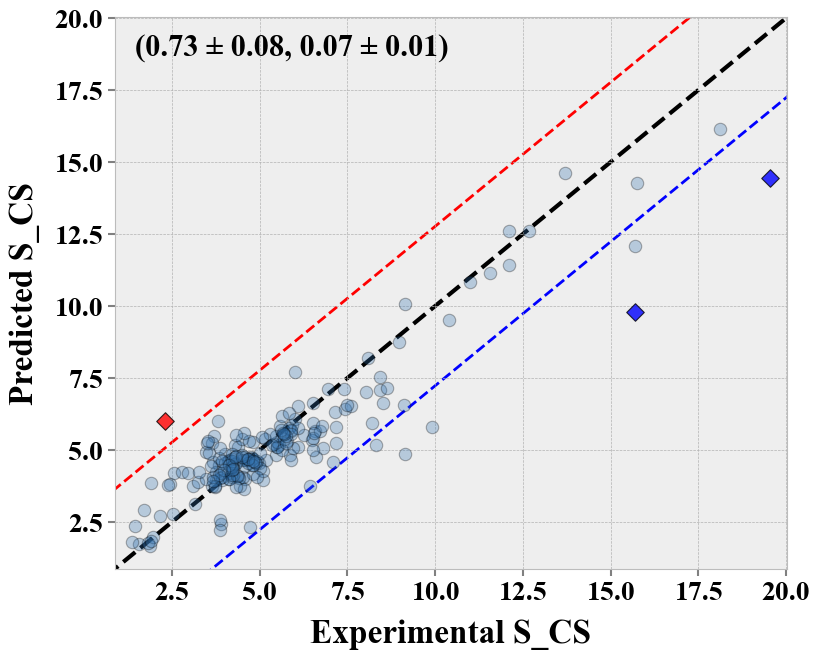

In [50]:
# 计算误差
errors = np.abs(all_predictions - all_actuals)

# 按误差降序排序索引（最大误差在最后）
sorted_idx = np.argsort(errors)

# 指定你要高亮的“误差排名”
selected_ranks = [0, 1, 4] 

# 获取对应的点索引（去重）
highlight_idx = list({sorted_idx[-(r + 1)] for r in selected_ranks})

# 其他点索引
others_idx = np.setdiff1d(np.arange(len(all_actuals)), highlight_idx)

# 构建理想线
sigma = np.std(all_actuals)
# 构建理想线的x和y值
min_val = min(all_actuals.min(), all_predictions.min())
max_val = max(all_actuals.max(), all_predictions.max())
# 设置理想线和偏差带用的横坐标范围，覆盖整个图像范围
x_vals = np.linspace(min_val - 20, max_val + 20, 100)
y_vals = x_vals
ci_upper = y_vals + 1.0 * sigma
ci_lower = y_vals - 1.0 * sigma

# 绘图
plt.figure(figsize=(8.5, 7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20
plt.style.use('bmh')

# 偏差带线和理想线
plt.plot(x_vals, ci_upper, color='red', linestyle='--', linewidth=2, zorder=1, label='±1.5σ upper')
plt.plot(x_vals, ci_lower, color='blue', linestyle='--', linewidth=2, zorder=1, label='±1.5σ lower')
plt.plot(x_vals, y_vals, 'k--', lw=3, zorder=1, label='Ideal: y = x')

# 画其他点（不在top3）
plt.scatter(all_actuals[others_idx], all_predictions[others_idx],
            alpha=0.3, marker='o', color='#3574B1', edgecolors='black',
            linewidths=0.8, s=80, zorder=2)
# 分别画 highlight_idx 中在上方和下方的点
existing_labels = set()
for i in highlight_idx:
    if all_predictions[i] > all_actuals[i]:
        color = 'red'
        label = 'Top error (above)'
    else:
        color = '#0000FF'
        label = 'Top error (below)'

    # 避免图例重复
    label = label if label not in existing_labels else None
    if label:
        existing_labels.add(label)

    plt.scatter(all_actuals[i], all_predictions[i],
                color=color, marker='D', edgecolors='black', alpha=0.8,
                linewidths=0.8, s=80, zorder=3, label=label)
# R² 和 RMSE 注释
plt.text(0.03, 0.93, f'({result["r2_val"]}, {result["mae_val"]})',
         fontsize=22, transform=plt.gca().transAxes)

# 标签和样式
plt.xlabel('Experimental S_CS', weight='bold', fontsize=24, fontname='Times New Roman', labelpad=10)
plt.ylabel('Predicted S_CS', weight='bold', fontsize=24, fontname='Times New Roman', labelpad=10)
plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=20, weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=5, width=1.5,
                color='gray', bottom=True, top=False, left=True, right=False)


# 坐标范围一致
min_val = min(all_actuals.min(), all_predictions.min())
max_val = max(all_actuals.max(), all_predictions.max())
plt.xlim(min_val - 0.5, max_val + 0.5)
plt.ylim(min_val - 0.5, max_val + 0.5)
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'S_CS-预测图.png'), dpi=600)
plt.show()

In [51]:
df_errors = pd.DataFrame({
    'Index': all_indices,
    'Actual': all_actuals,
    'Predicted': all_predictions
})
df_errors['Residuals'] = df_errors['Actual'] - df_errors['Predicted']
df_errors['Abs_Residuals'] = np.abs(df_errors['Residuals'])

# 排序
df_sorted = df_errors.sort_values(by='Abs_Residuals', ascending=False)
df_sorted.head(20)

,Index,Actual,Predicted,Residuals,Abs_Residuals
119,155,15.683297,9.781968,5.901329,5.901329
195,188,19.527027,14.428792,5.098235,5.098235
163,89,9.132420,4.863109,4.269311,4.269311
96,90,9.896646,5.782068,4.114578,4.114578
176,130,2.311734,5.999641,-3.687907,3.687907
175,129,15.683297,12.069251,3.614046,3.614046
192,181,8.316062,5.171075,3.144987,3.144987
75,25,6.430518,3.760573,2.669945,2.669945
164,91,9.100145,6.577582,2.522563,2.522563
112,142,7.100000,4.585915,2.514085,2.514085


In [52]:
df_top_actual = df.loc[df_sorted['Index'].head(15)]
df_top_actual

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,CHS,A_Mix_t,AB_Mix_t,Q,Cata_Code,MCS,CS_rate,CS_TD,Closed_CC,S_CS
155,0110000000,31.4,490.000000,4.300000,1000,18.000000,68.994067,1.379881,2.069822,1.207396,...,59.173675,15.00,15.00,336.000,100000,119.07962,0.001640,1,92.7412,15.683297
188,0110000010,31.0,450.000000,3.000000,1000,18.000000,56.497175,0.225989,1.186441,0.225989,...,63.898917,120.00,30.00,48.000,100000,150.00000,0.001983,1,96.3000,19.527027
89,0100010000,31.0,445.000000,5.960936,0001,70.100000,91.000000,18.200000,1.800000,0.910000,...,52.400000,60.00,15.00,1368.000,100000,243.24310,0.001667,0,93.0000,9.132420
90,0100100000,31.5,444.200000,5.477541,1000,18.000000,84.331087,0.842460,1.285341,0.243641,...,35.400000,120.00,10.00,648.905,011000,224.15060,0.001669,0,78.5855,9.896646
130,0100010000,31.4,211.000000,2.000000,1000,18.000000,83.851114,1.677022,0.419256,1.467394,...,54.391838,131.15,10.00,336.000,100000,48.00000,0.001640,0,57.0800,2.311734
129,0110000000,31.4,490.000000,4.300000,1000,18.000000,68.994067,1.379881,2.069822,1.207396,...,59.173675,16.70,10.00,336.000,100000,103.00000,0.001640,0,92.9800,15.683297
181,0110010000,31.0,354.090909,3.870909,1000,18.000000,71.890726,2.228613,1.078361,1.078361,...,58.176495,109.05,9.25,33.810,100000,154.47650,0.001667,0,94.0000,8.316062
25,0110010000,31.0,200.838968,2.678510,1000,18.000000,68.500000,2.700000,2.700000,1.360000,...,59.500000,600.00,10.00,370.000,100000,500.00000,0.001950,0,75.9520,6.430518
91,0110100000,31.5,437.054860,5.072699,1000,18.000000,95.953846,0.961538,1.583235,0.870072,...,34.500000,120.00,10.00,635.705,011000,283.98900,0.001799,0,86.1196,9.100145
142,0110110000,31.5,402.955272,5.547604,1001,96.565421,67.924528,19.622642,0.943396,1.320755,...,59.550000,742.80,20.00,336.000,100000,331.00000,0.001667,0,90.1871,7.100000


In [53]:
df = pd.read_csv("S_CSlog_填充.csv")
X = df.drop(["S_CS"], axis=1)
# 创建一个SHAP解释器
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X, check_additivity=False)
shap_values

array([[ 0.00361062,  0.00452513, -0.0101634 , ..., -0.00447156,
         0.02067008,  0.00369472],
       [ 0.00275577,  0.00195396, -0.01515412, ..., -0.00386861,
        -0.04692911,  0.0041073 ],
       [-0.01551677, -0.00380481,  0.00290915, ..., -0.0002743 ,
         0.00494372, -0.00664509],
       ...,
       [ 0.00880218,  0.00834455,  0.00943069, ...,  0.00845715,
        -0.00097644,  0.02072187],
       [ 0.00851735,  0.00764398,  0.00850651, ...,  0.00699422,
        -0.00155411,  0.01703865],
       [ 0.00855149,  0.00587225,  0.00819041, ...,  0.0071414 ,
        -0.00101618,  0.01553734]], shape=(200, 23))

In [54]:
import shap
import os
import matplotlib.pyplot as plt

# 设置字体和样式
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('default')

# 创建主图
fig, ax1 = plt.subplots(figsize=(10, 8), dpi=1200)

# 蜂巢图（dot plot）
feature_names = [name.replace("f(H2O)", r"f(H$_2$O)") for name in X.columns]
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="dot", show=False, color_bar=False, max_display=22)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  # 调整位置为主图 ax1
ax1 = plt.gca()

# 顶部条形图（bar plot）
ax2 = ax1.twiny()
shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar", show=False, max_display=22)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  # 确保对齐
for bar in ax2.patches:
    # bar.set_facecolor("skyblue")
    bar.set_alpha(0.2)

# 添加灰色参考线
ax2.axhline(y=22, color='black', linestyle='-', linewidth=2)

# 坐标轴标签设置,新罗马字体
ax1.set_xlabel('Shapley Value Contribution', fontsize=22, labelpad=10, weight='bold', fontname='Times New Roman')
ax1.set_ylabel('Features', fontsize=22, labelpad=10, weight='bold', fontname='Times New Roman')

ax2.set_xlabel('Mean (|Shapley Value|)', fontsize=22, labelpad=10, weight='bold', fontname='Times New Roman')
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

# 设置刻度字体大小和粗细
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')

for label in ax2.get_xticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')
# 边框
for spine in ['left',  'bottom']:
    ax1.spines[spine].set_visible(True)
    ax1.spines[spine].set_edgecolor('black')
    ax1.spines[spine].set_linewidth(1.5)

# 刻度线
ax1.tick_params(axis='both', direction='out', colors='black', width=1.5, length=5)
ax2.tick_params(axis='x', direction='out', colors='black', width=1.5, length=5)
# ax1.set_xlim(-0.18, 0.16)
ax2.set_xlim(0, 0.036)
# ax1.set_xticks(np.linspace(-0.15, 0.15, 5))
ax2.set_xticks(np.linspace(0, 0.036, 4))

# 调整排版，保存并展示
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'S_CS_SHAP.png'), dpi=600, bbox_inches='tight')
plt.show()
